Testing params: {'batch_size': 32, 'learning_rate': 0.01}
Validation accuracy: 0.9671666622161865


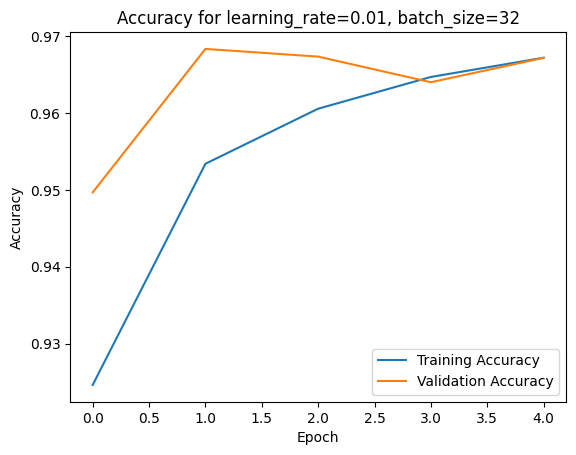

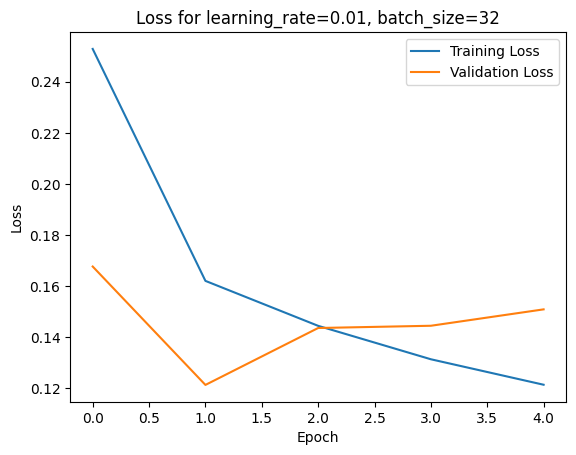

Testing params: {'batch_size': 32, 'learning_rate': 0.001}
Validation accuracy: 0.9763333201408386


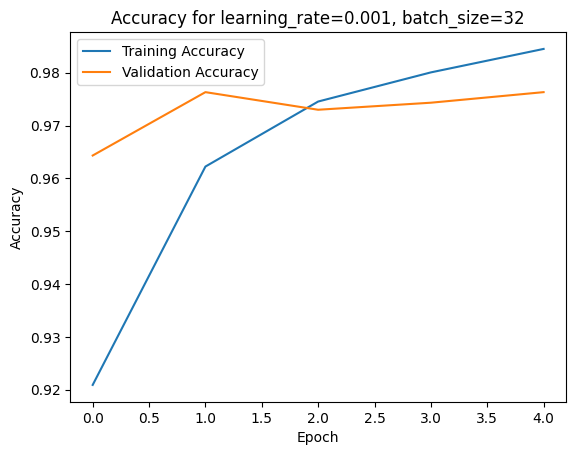

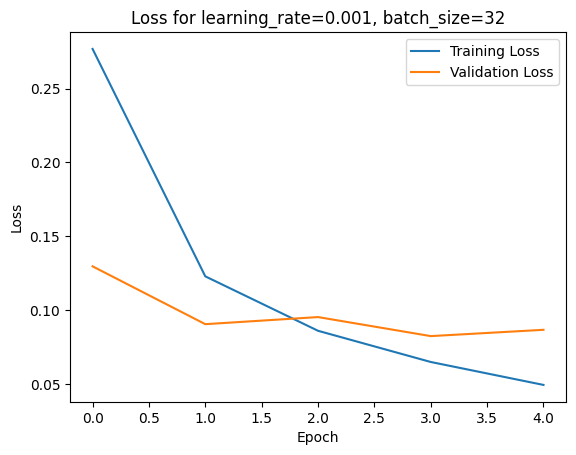

Testing params: {'batch_size': 32, 'learning_rate': 0.0001}
Validation accuracy: 0.9591666460037231


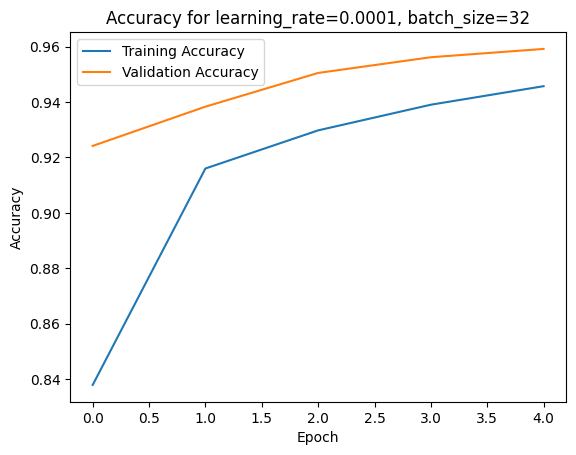

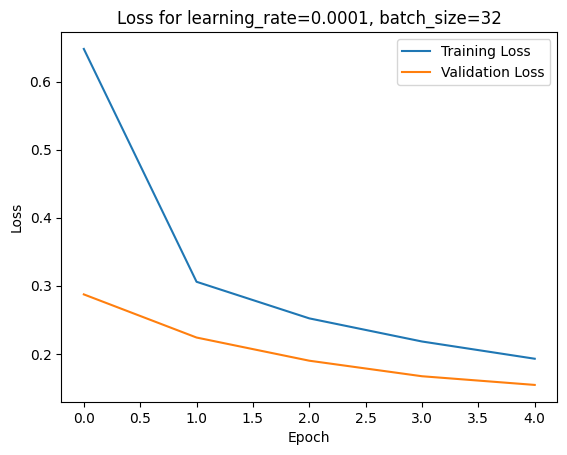

Testing params: {'batch_size': 64, 'learning_rate': 0.01}
Validation accuracy: 0.9698333144187927


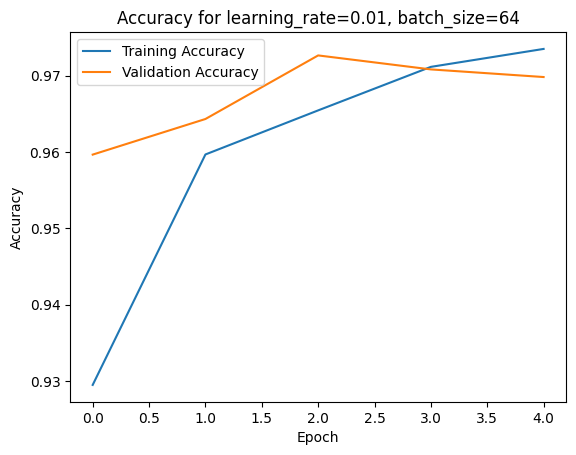

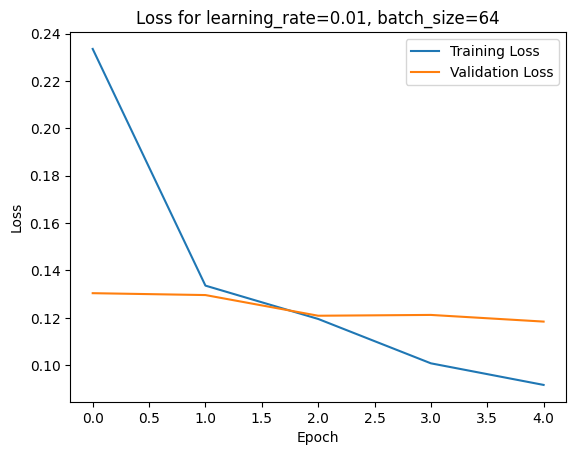

Testing params: {'batch_size': 64, 'learning_rate': 0.001}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Define a function to create and train the model
def create_model(learning_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to test
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128]
}

# Grid search over hyperparameters
best_accuracy = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print(f"Testing params: {params}")
    model = create_model(learning_rate=params['learning_rate'])
    history = model.fit(x_train, y_train, batch_size=params['batch_size'], epochs=5, verbose=0, validation_split=0.1)
    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation accuracy: {val_accuracy}")

    # Plot accuracy and loss for each combination
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for learning_rate={params['learning_rate']}, batch_size={params['batch_size']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss for learning_rate={params['learning_rate']}, batch_size={params['batch_size']}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"Best hyperparameters: {best_params}, Validation accuracy: {best_accuracy}")

# Train final model with best parameters
final_model = create_model(learning_rate=best_params['learning_rate'])
final_history = final_model.fit(x_train, y_train, batch_size=best_params['batch_size'], epochs=10, verbose=1)

# Plot final training and validation metrics
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.title("Final Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title("Final Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the final model
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

# Visualize predictions on test data
test_images = x_test[:10]
test_labels = y_test[:10]
predictions = final_model.predict(test_images)

for i in range(10):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.axis('off')
    plt.show()

# Confusion matrix
y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion)

